Performance of Random Forest Regression:
Mean Absolute Error (MAE): 7.455585054745291
Mean Squared Error (MSE): 9748.399808815155
R-squared: 0.9826510922658497
--------------------------------------------------
Random Forest Regression Performance:
MAE: 7.455585054745291
MSE: 9748.399808815155
R-squared: 0.9826510922658497
--------------------------------------------------


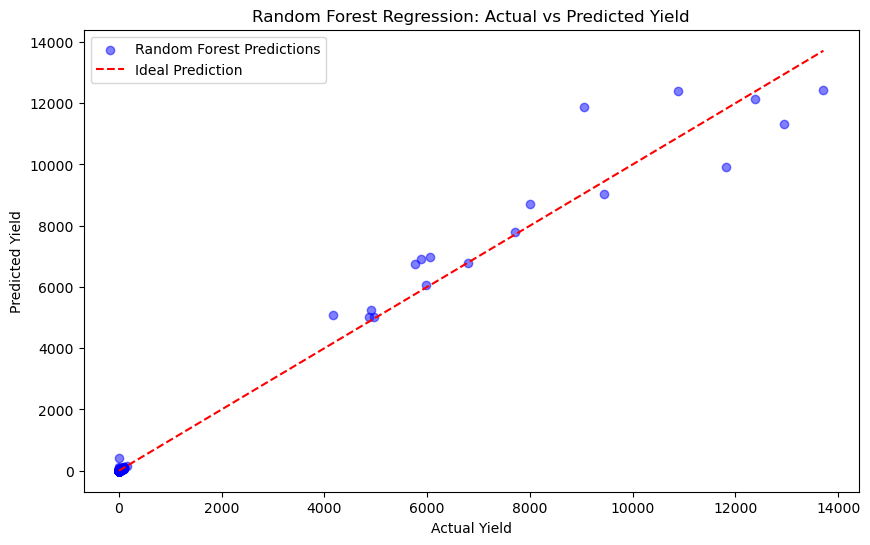

In [3]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


# Suppress all warnings
warnings.filterwarnings("ignore")

# Load the dataset
crop_yield_data = pd.read_csv('C:/Users/Chinmay/Downloads/Copy of crop_yield(1) (1).csv')

# Handle missing values
# Replace NaNs with mean for numeric columns and mode for categorical columns
for col in crop_yield_data.columns:
    if crop_yield_data[col].dtype == 'object':  # If column is categorical
        crop_yield_data[col].fillna(crop_yield_data[col].mode()[0], inplace=True)
    else:  # If column is numeric
        crop_yield_data[col].fillna(crop_yield_data[col].mean(), inplace=True)

# Use One-Hot Encoding for categorical columns
crop_yield_data = pd.get_dummies(crop_yield_data, columns=['Crop', 'Season', 'State'], drop_first=True)

# Reduce dataset size for testing purposes
crop_yield_data = crop_yield_data.sample(frac=0.6, random_state=42)  # Use 60% of the dataset

# Define features and target variable
X = crop_yield_data.drop(columns=['Yield'])
y = crop_yield_data['Yield']

# Generate Polynomial Features (degree=1 to avoid large feature set)
poly = PolynomialFeatures(degree=1, include_bias=False)
X_poly = poly.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Standardize the features to improve Gradient Descent convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Performance of {name}:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared: {r2}")
    print("-" * 50)
    return mae, mse, r2, y_pred

# Initialize Random Forest Regression model
random_forest_model = RandomForestRegressor(n_estimators=150, n_jobs=-1, random_state=42)

# Evaluate Random Forest Regression model
mae, mse, r2, y_pred = evaluate_model(random_forest_model, X_train_scaled, X_test_scaled, y_train, y_test, "Random Forest Regression")

# Print the evaluation results
print(f"Random Forest Regression Performance:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")
print("-" * 50)

# Actual vs Predicted Plot for Random Forest Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Random Forest Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Prediction')
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Random Forest Regression: Actual vs Predicted Yield")
plt.legend()
plt.show()


In [8]:
random_forest_model.predict(X)

array([3.31506549, 3.3735323 , 3.33446046, ..., 3.3735323 , 5.8518559 ,
       5.8518559 ])

In [7]:
from sklearn.model_selection import cross_val_score


# Cross-validation on the full dataset (using the original features X, y)
cross_val_scores = cross_val_score(random_forest_model, X, y, cv=5, scoring='r2')
print("Cross-Validation R^2 Scores:", cross_val_scores)
print("Mean R^2 Score from Cross-Validation:", cross_val_scores.mean())


Cross-Validation R^2 Scores: [0.98179295 0.99084027 0.93347672 0.94396344 0.97864436]
Mean R^2 Score from Cross-Validation: 0.9657435452775347


In [8]:
# Evaluate on the training set
y_train_pred = random_forest_model.fit(X_train_scaled, y_train).predict(X_train_scaled)
print("Training Metrics:")
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Train R-squared:", r2_score(y_train, y_train_pred))

Training Metrics:
Train MAE: 3.834917144349609
Train MSE: 3764.4207879201435
Train R-squared: 0.9953213300962813


In [9]:
# Evaluate on the testing set
y_test_pred = random_forest_model.predict(X_test_scaled)
print("Test Metrics:")
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Test R-squared:", r2_score(y_test, y_test_pred))

Test Metrics:
Test MAE: 7.455585054745291
Test MSE: 9748.399808815153
Test R-squared: 0.9826510922658497


In [4]:
import pickle
pickle.dump(random_forest_model,open('regmodel.pkl','wb'))

In [5]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [7]:
pickled_model.predict(X)

array([3.31506549, 3.3735323 , 3.33446046, ..., 3.3735323 , 5.8518559 ,
       5.8518559 ])